# - Classification -

# Data Preparation

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../input/bank-marketing-data-set/bank-additional-full.csv', sep=';')
print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93

# Data Cleansing

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
print(df.describe())

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

In [5]:
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


# Data Transformation and Visualization

In [6]:
df['job'] = df['job'].replace('\.+', '', regex=True)
df['education'] = df['education'].replace('\.+', ' ', regex=True).str.title()

obj_col_lc = list(df.select_dtypes(include=['object']).columns)
for i in range(len(obj_col_lc)):
    df[obj_col_lc[i]] = df[obj_col_lc[i]].str.title()

In [7]:
print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  Housemaid  Married     Basic 4Y       No      No   No  Telephone   
1   57   Services  Married  High School  Unknown      No   No  Telephone   
2   37   Services  Married  High School       No     Yes   No  Telephone   
3   40      Admin  Married     Basic 6Y       No      No   No  Telephone   
4   56   Services  Married  High School       No      No  Yes  Telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   May         Mon       261         1    999         0  Nonexistent   
1   May         Mon       149         1    999         0  Nonexistent   
2   May         Mon       226         1    999         0  Nonexistent   
3   May         Mon       151         1    999         0  Nonexistent   
4   May         Mon       307         1    999         0  Nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93

In [8]:
import matplotlib.pyplot as plt

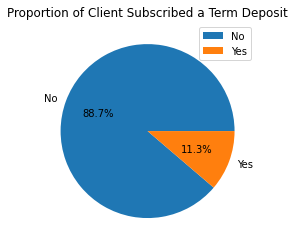

In [9]:
plt.pie(df.groupby(['y']).y.count().reset_index(name='counts').counts, labels=df.groupby(['y']).y.count().reset_index(name='counts').y, 
        autopct='%1.1f%%')
plt.title('Proportion of Client Subscribed a Term Deposit')
plt.legend()
plt.show()

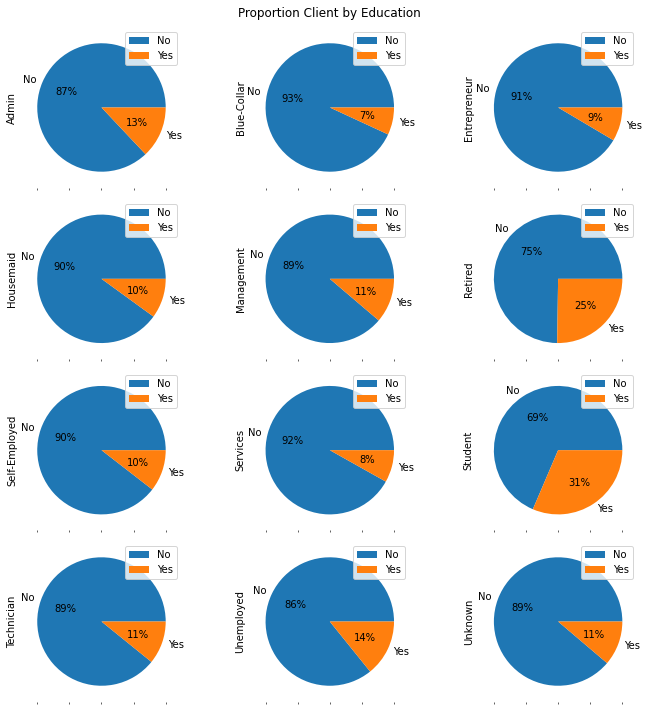

In [10]:
df_jc = df.pivot_table(index='y', columns='job', values='campaign', aggfunc='count', fill_value=0)
df_jc = df_jc.reindex(columns=df_jc.count().sort_values(ascending=False).index)
df_jc.plot.pie(subplots=True, 
               figsize=(10, 10),
               layout=(-1, 3),
               autopct='%1.0f%%',
               title='Proportion Client by Education')
plt.tight_layout()
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
df['month'] = df['month'].replace({'Mar': 2,'Apr': 3, 'May': 4, 'Jun': 5, 'Jul': 6, 'Aug': 7, 'Sep': 8, 'Oct': 9, 'Nov': 10, 'Dec': 11})
df['day_of_week'] = df['day_of_week'].replace({'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri': 4})

In [13]:
le = LabelEncoder()
for i in range(len(obj_col_lc)):
    df[obj_col_lc[i]] = le.fit_transform(df[obj_col_lc[i]])

## Correlation
Here, I will use Pearson's Correlation to select Independent Variable that have impact on the Dependent Variable

In [14]:
import seaborn as sns

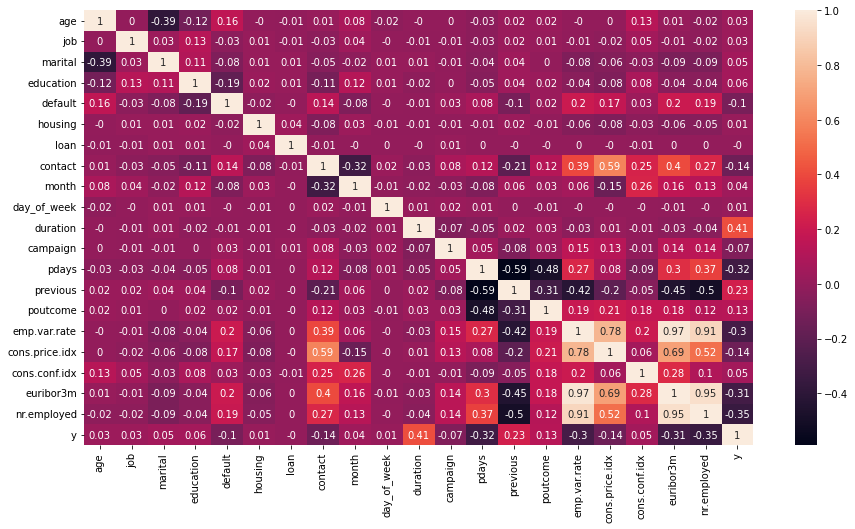

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(round(df.corr(),2), annot=True)
plt.show()

In [16]:
from scipy.stats import pearsonr

In [17]:
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [18]:
calculate_pvalues(df)['y']

age                  0.0
job                  0.0
marital              0.0
education            0.0
default              0.0
housing           0.0191
loan              0.3192
contact              0.0
month                0.0
day_of_week       0.0414
duration             0.0
campaign             0.0
pdays                0.0
previous             0.0
poutcome             0.0
emp.var.rate         0.0
cons.price.idx       0.0
cons.conf.idx        0.0
euribor3m            0.0
nr.employed          0.0
y                    0.0
Name: y, dtype: object

From the results of the Pearson correlation calculation above, it shows that the variable housing, loan, and day_of_week have no impact on the dependent variable, because: 
$$ p-value > 0.05 $$
So H0 rejected. For that, drop that columns.

In [19]:
df = df.drop(columns=['housing','loan','day_of_week'])

In [20]:
print(df.head())

   age  job  marital  education  default  contact  month  duration  campaign  \
0   56    3        1          0        0        1      2       261         1   
1   57    7        1          3        1        1      2       149         1   
2   37    7        1          3        0        1      2       226         1   
3   40    0        1          1        0        1      2       151         1   
4   56    7        1          3        0        1      2       307         1   

   pdays  previous  poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  \
0    999         0         1           1.1          93.994          -36.4   
1    999         0         1           1.1          93.994          -36.4   
2    999         0         1           1.1          93.994          -36.4   
3    999         0         1           1.1          93.994          -36.4   
4    999         0         1           1.1          93.994          -36.4   

   euribor3m  nr.employed  y  
0      4.857       5191.0

# Modelling

Here data is indicated imbalance (See ouput [9]). I create a model for this data using XGBoost Algorithm with imbalanace method.

In [21]:
X = df.drop(columns=['y'])
y = df.y

In [22]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score

In [23]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X[['default']])

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
resample = SMOTE(n_jobs=-1, random_state=42, k_neighbors=2)
X_train_res, y_train_res = resample.fit_resample(X_train, y_train)

In [26]:
def models(X_train, y_train, X_test, y_test):
    model = XGBClassifier(n_jobs = -1, random_state = 0, 
                          n_estimators = 1000, use_label_encoder = False, 
                          learning_rate = 0.2, gamma = 0.0, 
                          reg_alpha = 1, reg_lambda = 2)
    model.fit(X_train, y_train, eval_metric='error', 
              eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)
    best_model = model.get_booster().best_iteration
    y_pred = model.predict(X_test, iteration_range=(0, best_model))
    accuracy = accuracy_score(y_test, y_pred)
    precision_0 = precision_score(y_test, y_pred, pos_label=0)
    precision_1 = precision_score(y_test, y_pred, pos_label=1)
    confusionmatrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    
    return {'y_pred': y_pred, 'accuracy': accuracy, 'precision': (precision_0+precision_1)/2, 
            'confusionmatrix': confusionmatrix, 'best_iterations': best_model}

In [27]:
XGBmodel_res = models(X_train_res, y_train_res, X_test, y_test)

In [28]:
print('XGB Model with Resample')
print()
print('Confusion Matrix:')
print()
print(XGBmodel_res['confusionmatrix'])
print()
print('Accuracy Model:', '{:.2%}'.format(XGBmodel_res['accuracy']))
print()
print('Avg Precision Model:', '{:.2%}'.format(XGBmodel_res['precision']))

XGB Model with Resample

Confusion Matrix:

Predicted     0    1
Actual              
0          6908  363
1           386  581

Accuracy Model: 90.91%

Avg Precision Model: 78.13%


In [29]:
output = pd.DataFrame()
output['actual'] = y_test
output['y_pred'] = XGBmodel_res['y_pred']

In [30]:
print(output.head())

       actual  y_pred
39895       0       0
30603       0       0
35081       1       0
5005        0       0
37922       1       1


# Conclusion
The data used for this classification analysis turns out to be a data imbalance. Can be seen the output [9] "Proportion of Client Subscribed a Term Deposit". For that, I use SMOTE to solve the problem for data imbalance. Proportion of this Data Imbalance, inlcuded in moderate category 1-20% ([Shirazinia, 2020](https://medium.com/analytics-ai-swedbank/imbalanced-learning-in-banking-1bd3868a496d)). And the results of modelling using the imbalance method show good results in predicting the success of bank telemarketing. The accuracy obtained is **90.91%** and average precision from two labels is **78.13%**.